# ** Energy consumption - EDA Project**

The objective of the project is to analyze the data set which contain energy consumption of a city and weather data: {temperature, due point temperature (var1), wind speed. The other parameter is day and time. All these factors are input variables affecting electric energy consumption. The date-time is reflecting seasonality and time of day. it is widely believed that there is 1:1 mapping between {weather, seasonality & time-of-day} to electric energy consumption, therefore energy consumption may be future forecasted through time-series regression machine learning. The seasonality/day-of-week {Monday-Friday,Saturday,Sunday}/time of day is named professionally Time-Of-Use, and affects electricity Tariff time. This is called professionally electriicity load forecasting. the current project performs only data analytics over the data. Of special interest is the load pricing. Dependent on Tariff rates: high, medium, low - and energy consumption the load price is computed. 
The data is hourly and spanning for five years. So it's electricity-consumption=f(day and time, temperature, var1=due point, wind speed, var2). Var2 is the peak demand segmentation. it is anually split into: on-going continuous (A), 100 peak-demand anuall hours (B), and the rest of time (C). Project is intending to perform time-series load-forecasting. this paragraph however focus on preliminary analytics

# ** Import libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# **Preliminary**

**1.  Load the raw data from the csv file.**

**2. Check the first values of the raw data. **
**3. We now have a dataframe including train.csv file contents**

In [ ]:
df_io = pd.read_csv('../input/electricity-consumption/train.csv', date_parser='datetime')
df_io.head()

**3. Get basic information about the dataset: what are the variables input and output**

**4. Compute statistical basic data using describe method that returns: mean, deviation, max energy consumption,returns the 25th, 50th, and 75th percentiles.**

**5. T method operating upon .describe is T - Transpose of matrix reflecting rows as columns and columns as rows.  **

In [ ]:
df_io.describe().T

**4. Setting the datetime column as a time_date index.**

**5. Sort index.**

**6. Drop ID and datetime columns from the dataframe. **

**7. Rename var1 and var2 columns to dewpnt and peak_demand  respectively.**

**8. Checking which columns has nan values.**

In [ ]:
df = (df_io
      .set_index(pd.to_datetime(df_io.datetime))
      .sort_index()
      .rename(columns = {'var1':'dewpnt', 'var2':'peak_demand'})
      .drop(columns = ['ID', 'datetime']))
df.isna().sum()

In [ ]:
fig = plt.figure(figsize=(18, 9))
ax = fig.gca()
ax.plot(df.electricity_consumption)
ax.set_title('Total City Electricity Consumption ')
ax.set_ylabel('Power (kWatt)')
ax.set_xlabel('Datetime')
plt.show()   ## display figure plt

plot entire energy consumption from June/2013 up to june 2017 as function of datetime. notice quasi periodicity of graph indicating possible
1:1 mapping of consumption to rest of variables. plt is imported matplotlib.pyplot. figure function is the plot method. gca - get current axis

## **Distribution of electricity load consumption: **

In [ ]:
_ = df['electricity_consumption'].plot.hist(figsize=(13, 7), bins=200, title='Distribution of electricity_consumption Load')
plt.xlabel('Power (kWatt)')
plt.show()

Histogram: distribution of density – for each power (kWatt) it’s number of occurrences – after split into 200 bins.

In [ ]:
# Creating new featheres from the dataset.
df = (df.assign(day_of_week = df.index.dayofweek,
                year = df.index.year,
                month = df.index.month,
                day = df.index.day, 
                week = df.index.week,
                week_day = df.index.weekday_name, 
                quarter = df.index.quarter,
                hour = df.index.hour))


We extract  features of datetime index object. 
Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.


In [ ]:
df.head()

The enhanced with novel features dataframe is displayed. It is effective at time series load-forecasting. It may be used as additional sub-features affecting electric consumption. 


## **Winter Energy Consumption:**

In [ ]:
_ = (df['electricity_consumption'].loc[ (df['electricity_consumption'].index >= '2016-12-01') &
                                        (df['electricity_consumption'].index  < '2017-01-01') ] 
                                        .plot(figsize=(15, 5), title = 'December 2016'))
plt.show()

## **Summer Energy Consumption:**

In [ ]:
# Summer consumption
_ = (df['electricity_consumption'].loc[ (df['electricity_consumption'].index >= '2016-07-01') &
                                        (df['electricity_consumption'].index  < '2016-08-01') ] 
                                        .plot(figsize=(15, 5), title = 'July 2016'))
plt.show()

 # **Daily Trends**
 
 Daily trends: We analyze herein the weather as function of daytime

A **pivot table** is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). 

This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way.


## **Wind Speed:**

In [ ]:
_ = df.pivot_table(index   = df['hour'], 
                   columns = 'week_day', 
                   values  = 'windspeed',
                   aggfunc = 'mean').plot(figsize=(18,6),
                   title   = 'windspeed - Daily Trends')
plt.ylabel('Windspeed')
plt.show()

The above graphs shows windspeed average over entire data (using mean) as function of hour within the day, for each day-of-week.** Average windspeed(hour) is a periodic function that is day dependent.** The left most and rightmost corners nearly coincide.
This pivot_table generates a whole set of functions unobservable before that appear continuous – i.e. meaningful. 

## **Pressure:**

In [ ]:
_ = df.pivot_table(index   = df['hour'], 
                   columns = 'week_day', 
                   values  = 'pressure',
                   aggfunc = 'mean').plot(figsize=(18,6),
                   title   = 'pressure - Daily Trends')
plt.ylabel('Pressure')
plt.show()

The above graphs shows pressure average over entire data (using mean) as function of hour within the day, for each day-of-week. 
This pivot_table generates a whole set of functions unobservable before that appear continuous – i.e. meaningful.
**Average pressure(hour) is a periodic function that is hardly day dependent.** The left most and rightmost corners nearly coincide.

## **Temperature:**

In [ ]:
_ = df.pivot_table(index   = df['hour'], 
                   columns = 'week_day', 
                   values  = 'temperature',
                   aggfunc = 'mean').plot(figsize=(18,6),
                   title   = 'temperature - Daily Trends')
plt.ylabel('Temperature (Celsius)')
plt.show()

The above graphs shows temperature average over entire data (using mean) as function of hour within the day, for each day-of-week. This pivot_table generates a whole set of functions unobservable before that appear continuous – i.e. meaningful. ** Average Temperature(hour) is a periodic function that is hardly day dependent.** The left most and rightmost corners nearly coincide.

## **Dew Point:**

In [ ]:
_ = df.pivot_table(index   = df['hour'], 
                   columns = 'week_day', 
                   values  = 'dewpnt',
                   aggfunc = 'mean').plot(figsize=(18,6),
                   title   = 'dew point - Daily Trends')
plt.ylabel('Dew Point (Celsius)')
plt.show()

The above graphs shows dew point (temperature taking pressure into consideration) average over entire data (using mean) as function of hour within the day, for each day-of-week. This pivot_table generates a whole set of functions unobservable before that appear continuous – i.e. meaningful.  **Average dew_point(hour) is a periodic function that is day dependent.** The left most and rightmost corners nearly coincide.

## **Electricity Consumption:**

In [ ]:
_ = df[['electricity_consumption','hour']].plot(x = 'hour',
                                                y ='electricity_consumption',
                                                kind = 'scatter',
                                                figsize = (17,6),
                                                title = 'Consumption by Hour of Day')
plt.ylabel('Power (kWatt)')
plt.show()

A scatter plot (frequency of occurrence, distribution) shows power distribution over hour, not as average. 

In [ ]:
# %matplotlib notebook
_ = df.pivot_table(index   = df['hour'], 
                   columns = 'week_day', 
                   values  = 'electricity_consumption',
                   aggfunc = 'mean').plot(figsize=(18,6),
                   title   = 'electricity_consumption - Daily Trends')
plt.ylabel('Power (kWatt)')
plt.show()

Electricity consumption is not a weather parameter, rather it is a function of weather and historic load profile (history electricity consumption). The above graphs shows electricity consumption average over entire data (using mean) as function of hour within the day, for each day-of-week. This pivot_table generates a whole set of functions unobservable before that appear continuous – i.e. meaningful.  **Average electricity_consumption(hour) is a periodic function that is day dependent**. The left most and rightmost corners nearly coincide.

### **Box Plot**:
In descriptive statistics, a ** box plot** or ** boxplot** is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.

**The relation between box plot and normal distribution is:**
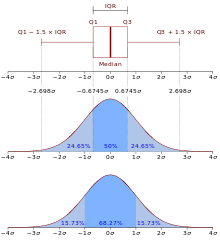

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df.loc[df['quarter']==1].hour, 
            df.loc[df['quarter']==1].electricity_consumption)
ax.set_title('Hourly Boxplot electricity_consumption Q1')
plt.ylabel('Power (kWatt)')

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df.loc[df['quarter']==2].hour,
            df.loc[df['quarter']==2].electricity_consumption)
ax.set_title('Hourly Boxplot electricity_consumption Q2')
plt.ylabel('Power (kWatt)')

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df.loc[df['quarter']==3].hour, 
            df.loc[df['quarter']==3].electricity_consumption)
ax.set_title('Hourly Boxplot electricity_consumption Q3')
plt.ylabel('Power (kWatt)')

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df.loc[df['quarter']==4].hour,
            df.loc[df['quarter']==4].electricity_consumption)
ax.set_title('Hourly Boxplot electricity_consumption Q4')
plt.ylabel('Power (kWatt)')

plt.show()

From the above diagrams we study the **load-duration pattern**. That specific electricity consumer (cluster) what is it’s specific day behavior. This is also a pattern enabling **customer segmentation** through load-duration plot.

 # **Yearly Trends**

In [ ]:
_ = df.pivot_table(index   = df['month'], 
                   columns = 'year', 
                   values  = 'electricity_consumption',
                   aggfunc = 'mean').plot(figsize = (18,6),
                                          title   = 'electricity_consumption - Yearly Trends')
plt.ylabel('Power (kWatt)')
plt.show()
# From july to aug we have the largest consumption.

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df.month, 
            df.electricity_consumption)
ax.set_title('Monthly Boxplot electricity_consumption')
plt.ylabel('Power (kWatt)')

plt.show()

In [ ]:
_ = df.pivot_table(index = df['month'], 
                   columns = 'year', 
                   values  = 'pressure',
                   aggfunc = 'mean').plot(figsize = (18,6),
                                          title   = 'pressure - Yearly Trends')
plt.ylabel('Pressure')
plt.show()

In [ ]:
_ = df.pivot_table(index   = df['month'], 
                   columns = 'year', 
                   values  = 'windspeed',
                   aggfunc = 'mean').plot(figsize = (18,6),
                                          title   = 'windspeed - Yearly Trends')
plt.ylabel('Windspeed')
plt.show()

In [ ]:
_ = df.pivot_table(index   = df['month'], 
                   columns = 'year', 
                   values  = 'temperature',
                   aggfunc = 'mean').plot(figsize = (18,6),
                                          title   = 'temperature - Yearly Trends')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [ ]:
_ = df.pivot_table(index   = df['month'], 
                   columns = 'year', 
                   values  = 'dewpnt',
                   aggfunc = 'mean').plot(figsize = (18,6),
                                          title   = 'dew point - Yearly Trends')
plt.ylabel('Dew Point (Celsius)')
plt.show()

# **Heat map**

In [ ]:
fig, ax = plt.subplots(figsize = (17,8))
corr = df.corr()
ax = sns.heatmap(corr, annot=True,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)
plt.show()

Heat map reflect cross-correlation matrix of linear adaptation between each two factors. We see for example that dewpoint is with strong correlation to energy consumption.


# **Future development**

## **Load pricing**
We plan in the future to create a load pricing based on the analysis we conducted. Tariff matrix reflects seasonality, day-of-week, high/medium/low tariff.
Multiplying the load consumption with tariff matrix enables computation of consumption price. It also enables for customer to compare several tariff programs and to determine one best for him.

In [ ]:
from IPython.display import Image
Image("../input/tarif-2010/tarif_2010.jpg")